## 시계열 데이터 특성 및 ETS 모델 이해

In [1]:
# 필요한 library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### additive: y_t = Trend + Seasonality + Error(Noise)

In [2]:
# 임의로 증가하는 series 생성
series = pd.Series([i + np.random.randint(10) for i in range(1, 100)])

In [3]:
# ETS model 생성
result = seasonal_decompose(series, model = 'additive', freq = 1)

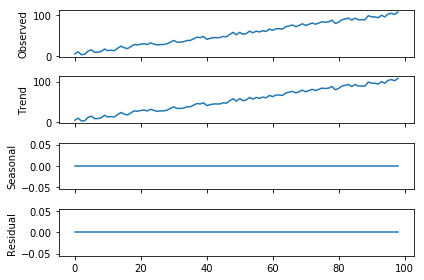

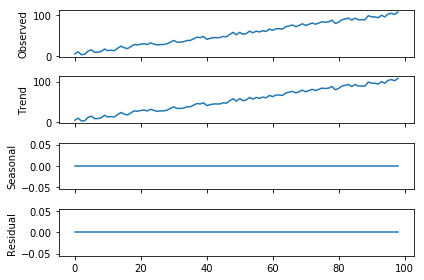

In [4]:
# ETS model plot
result.plot()

In [5]:
# 모델 plot 하는 함수 생성
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 8))
    decomposeresult.observed.plot(legend = False, ax=ax1)
    ax1.set_ylabel('Observed')
    decomposeresult.trend.plot(legend = False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend = False, ax=ax3)
    ax3.set_ylabel('Seosonal')
    decomposeresult.resid.plot(legend = False, ax=ax4)
    ax4.set_ylabel('Residual')

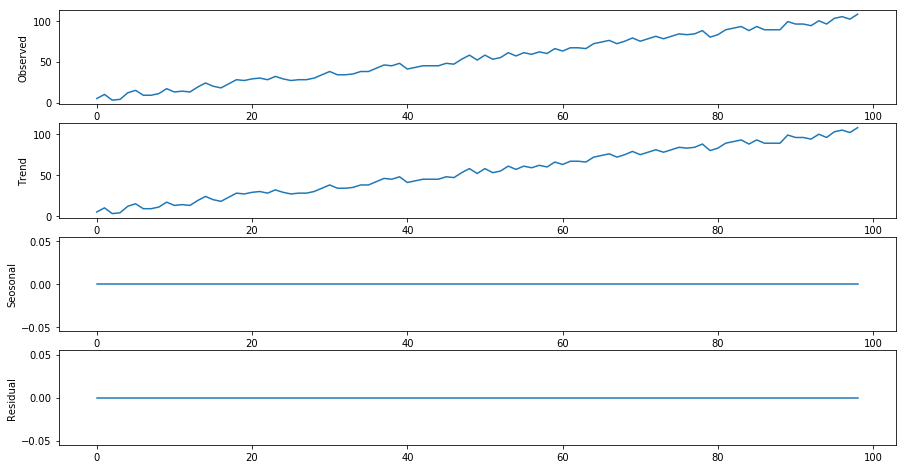

In [6]:
# ETS 모델 plot
plot_decompose(result)

### multiplicative: y_t = Level * Error * Trend * Seasonality
- log 하면 ETS와 동일

In [7]:
# 제곱으로 증가하는 series 생성
series = pd.Series([i**2 for i in range(1, 100)])

In [8]:
# ETS model 생성
result = seasonal_decompose(series, model = 'multiplicative', freq = 1)

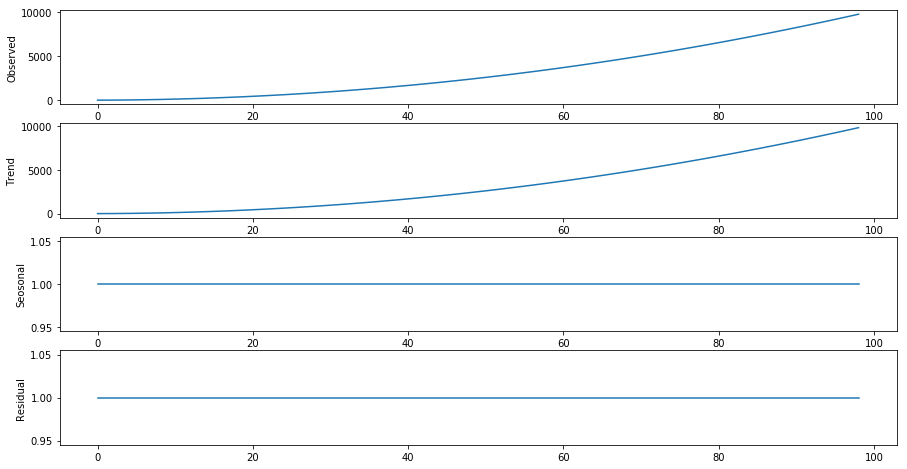

In [9]:
# ETS model plot
plot_decompose(result)

### 실습

In [10]:
# 필요한 csv 파일 불러오기
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month')

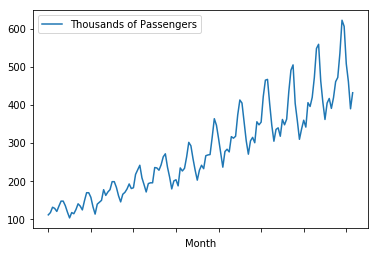

In [11]:
# airline DataFrame plot
airline.plot()

In [12]:
# airline DataFrame의 index를 datetime 형식으로 변경
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
# ETS model 생성
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

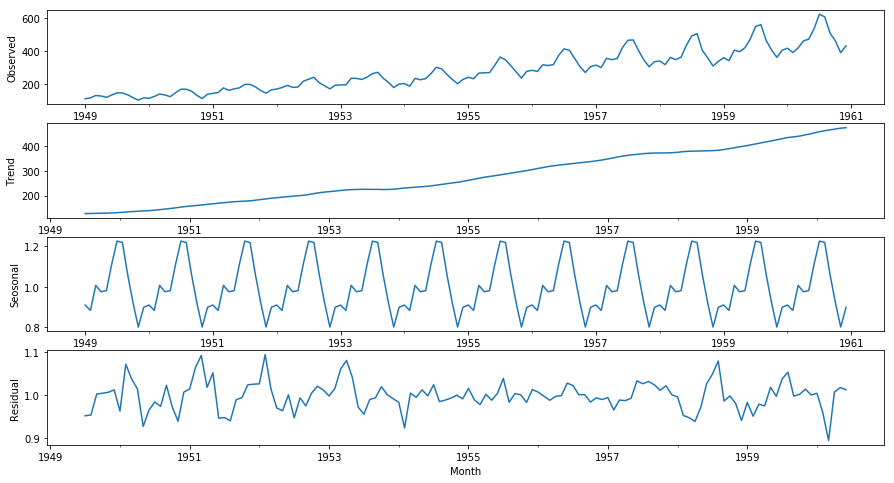

In [14]:
# ETS model plot
plot_decompose(result)